In [1]:
from packages import *
from base_time_series import *
from base_spatial import *
from misc import *

import packages; importlib.reload(packages)
import base_time_series; importlib.reload(base_time_series)
import base_spatial; importlib.reload(base_spatial)
import misc; importlib.reload(misc)

<module 'misc' from '/Users/tphillips/Atmospheric time series/misc.py'>

In [2]:
a_ = 36525

def write_series(x):
    f=open("potsd.dat","w")
    for i in x:
        f.write(str(i)+'\n')
    f.close()

def double_lin(save=None, years=71, xticks = [[0, 30*365.25, 60*365.25],[1950, 1980, 2010]]):

    s = 18
    params = {'xtick.labelsize': s, 'ytick.labelsize': s, 'legend.fontsize': s,
              'axes.labelsize': s, 'axes.titlesize': s, 'font.size': s,
              'legend.handlelength': 2}
    
    sns.set_theme(style="white", rc=params)

    f = open('pot_check.bin', 'rb')
    dt = np.dtype('double')
    potsdam = np.fromfile( f, dtype=dt, count=-1 )
    f.close()

    f = open('error.bin', 'rb')
    dt = np.dtype('float32')
    x_err = np.fromfile( f, dtype=dt, count=-1 )
    f.close()

    f = open('fit_results.bin', 'rb')
    dt = np.dtype('double')
    results = np.fromfile( f, dtype=dt, count=-1 )
    f.close()

    slop1, off1 = results[2], results[3]
    slop2, off2 = results[4], results[5]

    print("slop1 = ", results[2], " off1 = ", results[3])
    print("slop2 = ", results[4], " off2 = ", results[5])
    print("slope 1 (K/100y) = ", results[2]*36525, " slope 2 (K/100y) = ", results[4]*36525)

    doub_tr = []
    ch_point = results[1] #13140

    for i in range(len(potsdam)):
        if i < ch_point:
            doub_tr.append(off1 + slop1*i)
        if i >= ch_point:
            doub_tr.append(off2 + slop2*(i-ch_point))

    x_ = list(range(len(potsdam))) 
    x  = 365.25*np.array(list(range(1,years)))

    ###

    f, (ax2, ax) = plt.subplots(2, 1, figsize=(6, 5), sharex=True)
    #ax2 = ax.twinx()

    ax.axvline(ch_point, color='grey', ls='--', alpha=0.6)
    ax.plot(potsdam, "-", linewidth=0.2,)

    #ax.plot(doub_tr, 'r-', linewidth=2)
    b = int(ch_point)
    ax.plot(x_[:b], doub_tr[:b], 'r-', linewidth=2)
    ax.plot(x_[b:], doub_tr[b:], c='firebrick', ls='-', linewidth=2)

    ax.set_xlabel('Year')
    ax.set_xticks(xticks[0]) 
    ax.set_xticklabels(xticks[1])         
    ax.set_ylabel('T (°C)')
    ax.tick_params(which="both", bottom=True)

    ax2.plot(x, x_err,'mo', markersize=8, mec = 'k')
    ax2.set_ylabel('Error')
    ax2.grid(alpha=0.3, ls='--')
    ax2.grid(which = "minor", alpha=0.3)
    ax2.minorticks_on()
    ax2.set_ylim([min(x_err)-200, max(x_err)+200])
    ax2.ticklabel_format(axis="y", style="sci", scilimits=(0,0)) 

    ax2.plot([], 'r-', linewidth=2, label='Double fit')
    ax2.axvline(ch_point, color='grey', ls='--', alpha=0.6, label='Min. err')
    ax2.legend(fontsize=16)

    if save:
        f.savefig('pics/double_lin_'+save+'.png', format='png', dpi=200, bbox_inches="tight")

In [3]:
pot = pd.read_csv("/Users/tphillips/Atmospheric time series/cdc_data/1950/germ_daily_mean_t_1950.csv", sep=' ')
pot = pot.rename(columns={'STATIONS_ID': 'Station', 'MESS_DATUM': 'Date', 'TMK': 'Temp'})

pot.drop(pot.index[pot['Temp'] == "TMK"], inplace=True)
pot['Temp'] = pot['Temp'].astype(float)

stations =  pd.unique(pot['Station'])

pot['Date'] = pd.to_datetime(pot['Date'], infer_datetime_format=True)

pot['year'] = pd.DatetimeIndex(pot['Date']).year
pot['month'] = pd.DatetimeIndex(pot['Date']).month
pot['day'] = pd.DatetimeIndex(pot['Date']).day

temp = pot[pot['Station']== stations[40]] # Potsdam 3987
temp = temp[temp['year']>1949] #

temp.head(3)

,Station,Date,Temp,year,month,day
1671788,3987,1950-01-01,-3.7,1950,1,1
1671789,3987,1950-01-02,0.4,1950,1,2
1671790,3987,1950-01-03,2.1,1950,1,3


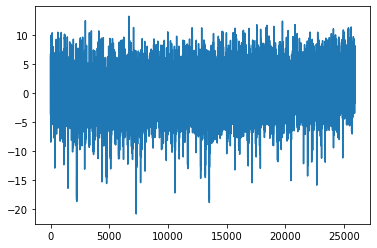

In [4]:
temp = detrend(temp)

write_series(temp)
 
plt.plot(temp)

In [53]:
# f = FortranFile('pot_.dat', 'w')
# f.write_record(np.array(potsdam.tolist(), dtype=np.float32))
# f.close()

# from scipy.io import FortranFile
# f = FortranFile( 'fort.9', 'r' ) # 'pcp.bin'

# f = FortranFile( 'tseries.bin', 'r' )
# print( f.read_reals( dtype='float32' ) )

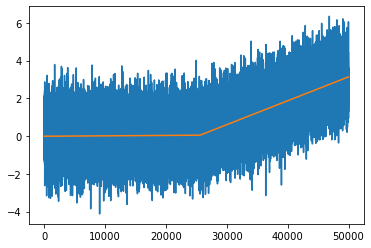

In [44]:
slop1, off1 = 1.9435668543320532E-006,  -7.4991397513428952E-003
slop2, off2 = 1.2664699219319282E-004,   4.2158993376841064E-002

doub_tr = []
ch_point = 25550

for i in range(len(x)):
    if i < ch_point:
        doub_tr.append(off1 + slop1*i)
    if i >= ch_point:
        doub_tr.append(off2 + slop2*(i-ch_point))

f, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.plot(x) # potsdam
ax.plot(np.array(doub_tr))

slop1 =  1.19467354612209e-05  off1 =  -0.5937182109443264
slop2 =  0.00015099816892180082  off2 =  -0.4367381069838838
slope 1 (K/100y) =  0.4363545127210934  slope 2 (K/100y) =  5.515208119868775


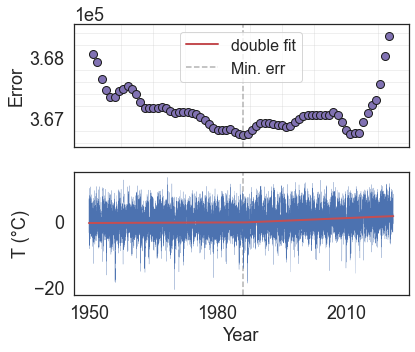

In [206]:
double_lin(save='potsdam')

In [49]:
f = '/Users/tphillips/Atmospheric time series/big/T_daymean_ecmwf_50to2020.nc'
nam, coor, step = 'germany', [55, 5, 47, 16], 0.5

print("Average")
x_av_ge, ge_l = av_signal(f, coor, step)
print(ge_l)

d, a, r_trend, var, tp_an, vtr_an, d_err = p_val(x_av_ge, ar=1, an=True, d_b=0, order=2)
print("d = ", d, d_err)
print("m = ", r_trend*a_, np.sqrt(np.mean(ge_l['vtrar']))*a_)

print("PC1")
pc1_ge, ge_pc_l = eof_pcs(f, nam, coor, pcs='single')
print(ge_pc_l)

d, a, r_trend, var, tp_an, vtr_an, d_err = p_val(pc1_ge, ar=1, an=True, d_b=0, order=2)
print("d = ", d, d_err)
print("m = ", r_trend*a_, np.sqrt(np.mean(ge_l['vtrar']))*a_)

Average
          m         d        a       var  tp_mc  tpar_mc            tp  \
0  0.000074  0.157732  0.80375  9.884943    NaN      NaN  1.065814e-13   

       tpar           vtr         vtrar  
0  0.001108  9.884076e-11  5.143765e-10  
d =  0.1577315463092619 [0.05687839859939603, 0.10599513666068205]
m =  2.7026809908515035 0.8283822461675152
PC1
[7.369726133976684e-05, 0.1557311462292459, 0.8020390240178417, 9.969394, 6.705747068735946e-14, 0.0010141100077938336, 9.645376415785271e-11, 5.025245414582479e-10]
d =  0.1557311462292459 [0.05783637782112805, 0.1097820813263286]
m =  2.691792470434984 0.8283822461675152


slop1 =  -3.3044071096606644e-06  off1 =  -0.4983313974001868
slop2 =  0.00011983511376632562  off2 =  -0.533308546655945
slope 1 (K/100y) =  -0.12069346968035577  slope 2 (K/100y) =  4.3769775303150436


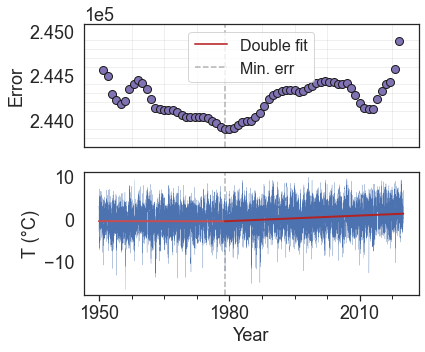

In [62]:
write_series(x_av_ge)
double_lin(save='ger_av', years=70) 

slop1 =  -3.215425158739837e-06  off1 =  -0.4967623711092111
slop2 =  0.00011930745467079128  off2 =  -0.5307976464144722
slope 1 (K/100y) =  -0.11744340392297255  slope 2 (K/100y) =  4.357704781850652


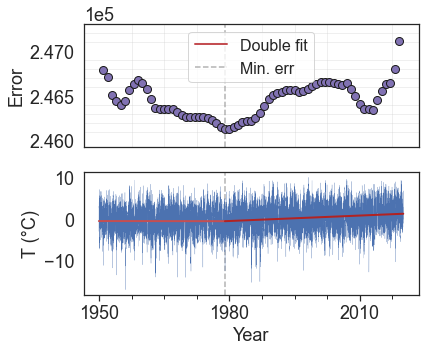

In [60]:
write_series(pc1_ge)
double_lin(save='ger_pc1', years=70)

### Antarctica

In [43]:
per = ['1979-01-01', '2022-12-31']

f = '/Users/tphillips/Atmospheric time series/big/T_antarctic_land_1_day_ecmwf_50to2022_2.nc'
nam, coor, step = 'antarc', [-67, -180, -90, 180], 1

print("Average")
x_av, l = av_signal(f, coor, step, per=per)
print(l)

d, a, r_trend, var, tp_an, vtr_an, d_err = p_val(x_av, ar=1, an=True, d_b=0, order=2)
print("d = ", d, d_err)
print("m = ", r_trend*a_, np.sqrt(np.mean(l['vtrar']))*a_)

print("PC1")
pc1, pc_l = eof_pcs(f, nam, coor, per=per, pcs='single')
print(pc_l)

d, a, r_trend, var, tp_an, vtr_an, d_err = p_val(pc1, ar=1, an=True, d_b=0, order=2)
print("d = ", d, d_err)
print("m = ", r_trend*a_, np.sqrt(np.mean(l['vtrar']))*a_)

Average
          m         d         a       var  tp_mc  tpar_mc        tp      tpar  \
0  0.000037  0.189338  0.892961  4.549932    NaN      NaN  0.020334  0.378061   

            vtr         vtrar  
0  2.578393e-10  1.786721e-09  
d =  0.18933786757351467 [0.0619114334068106, 0.09898968558734023]
m =  1.3609665145697114 1.5438979095338121
PC1
[1.5513111694953737e-05, 0.44018803760752145, 0.741677985895117, 3.057103, 0.8046725793997374, 0.8310788518218084, 3.934692265367419e-09, 5.288343990955077e-09]
d =  0.44018803760752145 [0.31168884756111614, 0.09498103206201625]
m =  0.5666164046581853 1.5438979095338121


In [83]:
per = ['1979-01-01', '2022-12-31']

f = '/Users/tphillips/Atmospheric time series/big/T_antarctic_land_1_day_ecmwf_50to2022_2.nc'
nam, coor, step = 'antarc', [-67, -180, -90, 180], 1

print("Average")
x_av, l = av_signal(f, coor, step, per=per)
print(l)

d, a, r_trend, var, tp_an, vtr_an, d_err = p_val(x_av, ar=1, an=True, d_b=0, order=2)
print("d = ", d, d_err)
print("m = ", r_trend*a_, np.sqrt(np.mean(l['vtrar']))*a_)

Average
          m         d         a       var  tp_mc  tpar_mc        tp      tpar  \
0  0.000037  0.189338  0.892961  4.549932    NaN      NaN  0.020334  0.378061   

            vtr         vtrar  
0  2.578393e-10  1.786721e-09  
d =  0.18933786757351467 [0.0619114334068106, 0.09898968558734023]
m =  1.3609665145697114 1.5438979095338121


slop1 =  -6.006870834264579e-05  off1 =  0.029773588740376177
slop2 =  7.90013275435331e-05  off2 =  -0.3210276679806753
slope 1 (K/100y) =  -2.1940095722151374  slope 2 (K/100y) =  2.885523488527547


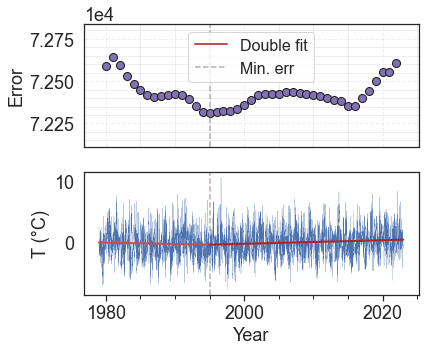

In [86]:
write_series(x_av)
double_lin(save='ant_av', years=44,
           xticks = [[365.25, 21*365.25, 41*365.25],[1980, 2000, 2020]])

slop1 =  -6.006870834264579e-05  off1 =  0.029773588740376177
slop2 =  7.90013275435331e-05  off2 =  -0.3210276679806753
slope 1 (K/100y) =  -2.1940095722151374  slope 2 (K/100y) =  2.885523488527547


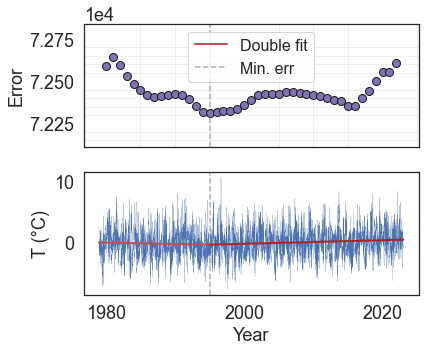

In [48]:
write_series(pc1)
double_lin(save='ant_pc1', years=44,
           xticks = [[365.25, 21*365.25, 41*365.25],[1980, 2000, 2020]])

In [42]:
per = ['2002-01-01', '2022-12-31']

f = '/Users/tphillips/Atmospheric time series/big/T_antarctic_land_1_day_ecmwf_50to2022_2.nc'
nam, coor, step = 'antarc', [-67, -180, -90, 180], 1

print("Average")
x_av, l = av_signal(f, coor, step, per=per)
print(l)

d, a, r_trend, var, tp_an, vtr_an, d_err = p_val(x_av, ar=1, an=True, d_b=0, order=2)
print("d = ", d, d_err)
print("m = ", r_trend*a_, np.sqrt(np.mean(l['vtrar']))*a_)

print("PC1")
pc1, pc_l = eof_pcs(f, nam, coor, per=per, pcs='single')
print(pc_l)

d, a, r_trend, var, tp_an, vtr_an, d_err = p_val(pc1, ar=1, an=True, d_b=0, order=2)
print("d = ", d, d_err)
print("m = ", r_trend*a_, np.sqrt(np.mean(l['vtrar']))*a_)

Average
          m         d         a       var  tp_mc  tpar_mc      tp      tpar  \
0  0.000057  0.158132  0.896217  4.109933    NaN      NaN  0.0765  0.540425   

            vtr         vtrar  
0  1.046989e-09  8.767445e-09  
d =  0.158131626325265 [0.06734985051285003, 0.07882874404967188]
m =  2.093699202534167 3.4200051564328073
PC1
[1.440662260359514e-05, 0.17613522704540907, 0.8490249678317376, 2.6645129, 0.6259503269387485, 0.8402172041700755, 8.735034943695729e-10, 5.105675998543052e-09]
d =  0.17613522704540907 [0.09312015080131197, 0.1818501299922145]
m =  0.5262018905963125 3.4200051564328073


slop1 =  -0.005419312680923658  off1 =  1.6058470256656812
slop2 =  9.348959152083704e-05  off2 =  -0.37220210287145394
slope 1 (K/100y) =  -197.9403956707366  slope 2 (K/100y) =  3.414707330298573


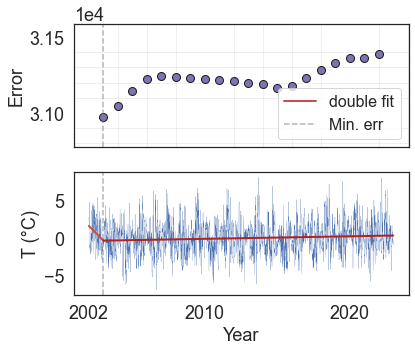

In [46]:
#write_series(x_av)
double_lin(save='ant_av_2002', years=21,
           xticks = [[0, 8*365.25, 18*365.25],[2002, 2010, 2020]])

slop1 =  -0.005419312680923658  off1 =  1.6058470256656812
slop2 =  9.348959152083704e-05  off2 =  -0.37220210287145394
slope 1 (K/100y) =  -197.9403956707366  slope 2 (K/100y) =  3.414707330298573


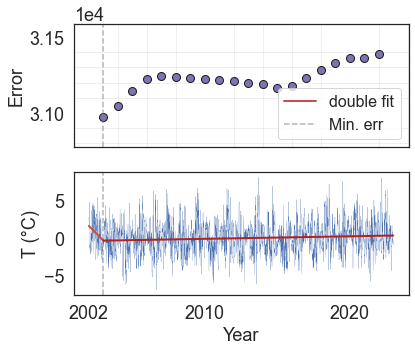

In [47]:
write_series(pc1)
double_lin(save='ant_pc1_2002', years=21,
           xticks = [[0, 8*365.25, 18*365.25],[2002, 2010, 2020]])

### Greenland

In [36]:
f = '/Users/tphillips/Atmospheric time series/big/T_greenland_land_1_day_ecmwf_50to2022.nc'
nam, coor, step = 'greenland', [90, -70, 60, -15], 1
per=['1979-01-01', '2021-12-31']

print("Average")
x_av, l = av_signal(f, coor, step, per=per)
print(l)

d, a, r_trend, var, tp_an, vtr_an, d_err = p_val(x_av, ar=1, an=True, d_b=0, order=2)
print("d = ", d, d_err)
print("m = ", r_trend*a_, np.sqrt(np.mean(l['vtrar']))*a_)

print("PC1")
pc1, pc_l = eof_pcs(f, nam, coor, per=per, pcs='single')
print(pc_l)

d, a, r_trend, var, tp_an, vtr_an, d_err = p_val(pc1, ar=1, an=True, d_b=0, order=2)
print("d = ", d, d_err)
print("m = ", r_trend*a_, np.sqrt(np.mean(l['vtrar']))*a_)

Average
          m        d         a       var  tp_mc  tpar_mc        tp      tpar  \
0  0.000137  0.25215  0.803762  11.60433    NaN      NaN  0.001276  0.085279   

            vtr         vtrar  
0  1.795883e-09  6.295571e-09  
d =  0.25215043008601723 [0.0747939314701066, 0.07659643803335325]
m =  4.987602556008927 2.8980627220622637
PC1
[0.0001091057722101274, 0.24574914982996598, 0.7673240918307065, 11.034117, 0.005652750832264353, 0.12539738381173549, 1.5538304432132837e-09, 5.067780926637979e-09]
d =  0.24574914982996598 [0.08577130212756934, 0.07780900934189172]
m =  3.9850883299749036 2.8980627220622637


slop1 =  -0.0006190006220387442  off1 =  -0.14213665850075316
slop2 =  0.0001553711111075702  off2 =  -1.0458775666773197
slope 1 (K/100y) =  -22.60899771996513  slope 2 (K/100y) =  5.6749298332040015


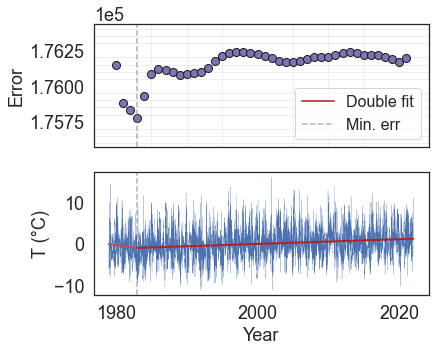

In [38]:
write_series(x_av)
double_lin(save='gr_av', years=43,
           xticks = [[365.25, 21*365.25, 41*365.25],[1980, 2000, 2020]])

slop1 =  -0.0007744761341519174  off1 =  -0.007637774900792022
slop2 =  0.00012155331918801344  off2 =  -0.8556891417971415
slope 1 (K/100y) =  -28.28774079989878  slope 2 (K/100y) =  4.439734983342191


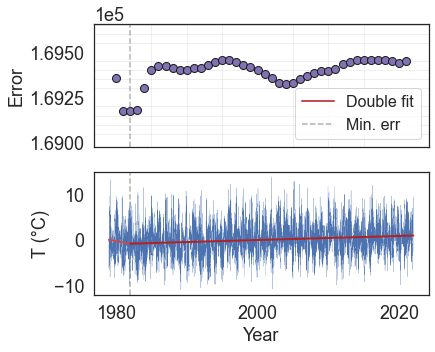

In [42]:
write_series(pc1)
double_lin(save='gr_pc1', years=43,
           xticks = [[365.25, 21*365.25, 41*365.25],[1980, 2000, 2020]])

### Arctic

In [63]:
f = '/Users/tphillips/Atmospheric time series/ecmwf/world_sea_1/T_world_sea_1_day_ecmwf_50to2021.nc'
nam, coor, step = 'greenland', [90, 0, 60, 365], 1 
 
# eof_run(f, coor=coor, t_slice=per)
per=['1979-01-01', '2021-12-31']

print("Average")
x_av, l = av_signal(f, coor, step, per=per)
print(l)

d, a, r_trend, var, tp_an, vtr_an, d_err = p_val(x_av, ar=1, an=True, d_b=0, order=2)
print("d = ", d, d_err)
print("m = ", r_trend*a_, np.sqrt(np.mean(l['vtrar']))*a_)

print("PC1")
pc1, pc_l = eof_pcs(f, nam, coor, pcs='single') # I forgot per=per
print(pc_l)

d, a, r_trend, var, tp_an, vtr_an, d_err = p_val(pc1, ar=1, an=True, d_b=0, order=2)
print("d = ", d, d_err)
print("m = ", r_trend*a_, np.sqrt(np.mean(l['vtrar']))*a_)

Average
          m         d         a       var  tp_mc  tpar_mc            tp  \
0  0.000166  0.334967  0.886167  1.942493    NaN      NaN  7.471096e-08   

      tpar           vtr         vtrar  
0  0.00163  9.564021e-10  2.791043e-09  
d =  0.33496699339867975 [0.05591247544709732, 0.07260568872345086]
m =  6.080986623252438 1.9296276672998258


slop1 =  4.59453051034276e-05  off1 =  -0.9343197571668093
slop2 =  0.0002063788761653999  off2 =  -0.6995392480882943
slope 1 (K/100y) =  1.678152268902693  slope 2 (K/100y) =  7.5379884519412315


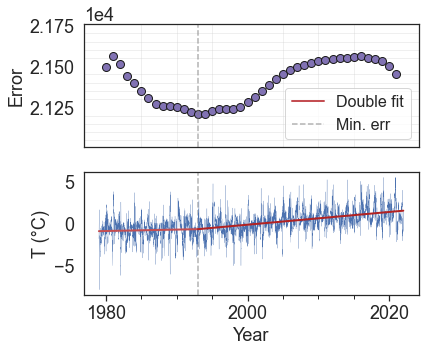

In [65]:
write_series(x_av)
double_lin(save='arc_av', years=43,
           xticks = [[365.25, 21*365.25, 41*365.25],[1980, 2000, 2020]])

slop1 =  1.6031163047923022e-05  off1 =  -0.27458521759523136
slop2 =  7.285656383711507e-05  off2 =  0.02383488254185573
slope 1 (K/100y) =  0.5855382303253884  slope 2 (K/100y) =  2.661085994150628


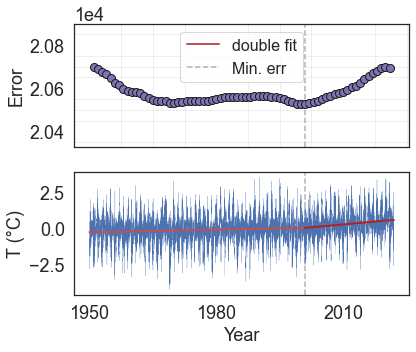

In [27]:
write_series(pc1)
double_lin(save='arc_pc1', years=72)

### Central Europe

In [66]:
f = '/Users/tphillips/Atmospheric time series/big/T_ceneur_sea_05_day_ecmwf_50to2020.nc'
nam, coor, step = 'cen_eur_05', [65, 3, 47, 23], 1

print("Average")
x_av, l = av_signal(f, coor, step)
print(l)

d, a, r_trend, var, tp_an, vtr_an, d_err = p_val(x_av, ar=1, an=True, d_b=0, order=2)
print("d = ", d, d_err)
print("m = ", r_trend*a_, np.sqrt(np.mean(l['vtrar']))*a_)

print("PC1")
pc1, pc_l = eof_pcs(f, nam, coor, pcs='single')
print(pc_l)

d, a, r_trend, var, tp_an, vtr_an, d_err = p_val(pc1, ar=1, an=True, d_b=0, order=2)
print("d = ", d, d_err)
print("m = ", r_trend*a_, np.sqrt(np.mean(l['vtrar']))*a_)

Average
          m         d         a       var  tp_mc  tpar_mc        tp      tpar  \
0  0.000071  0.257351  0.808967  5.737046    NaN      NaN  0.000025  0.023839   

            vtr         vtrar  
0  2.854701e-10  9.926319e-10  
d =  0.2573514702940588 [0.033104291918755635, 0.04277258372785031]
m =  2.600789134183812 1.1507588938347662


slop1 =  -3.2642269999105374e-06  off1 =  -0.4710466774042377
slop2 =  0.00011944905341482802  off2 =  -0.5067899630532581
slope 1 (K/100y) =  -0.11922589117173238  slope 2 (K/100y) =  4.362876675976594


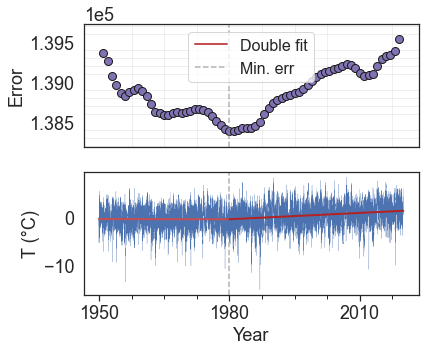

In [68]:
write_series(x_av)
double_lin(save='cen_eur_av', years=70)

slop1 =  -2.7090939707154095e-06  off1 =  -0.43510197697836966
slop2 =  0.00010970389722133254  off2 =  -0.4647665559577034
slope 1 (K/100y) =  -0.09894965728038033  slope 2 (K/100y) =  4.006934846009171


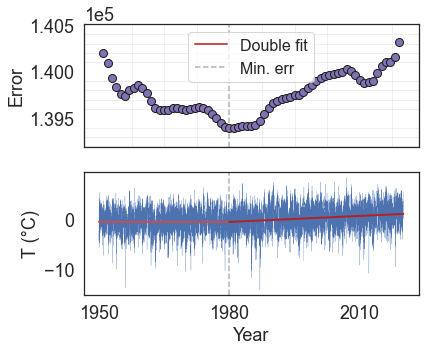

In [35]:
write_series(pc1)
double_lin(save='cen_eur_pc1', years=70)

In [ ]:
# Look at Arctic
# Look at anything above 60 degrees latitute
# 

In [78]:
import myflib

ImportError: dlopen(/Users/tphillips/Atmospheric time series/myflib.cpython-39-darwin.so, 0x0002): tried: '/Users/tphillips/Atmospheric time series/myflib.cpython-39-darwin.so' (mach-o file, but is an incompatible architecture (have (arm64), need (x86_64)))

In [93]:
import myflib

ImportError: dlopen(/Users/tphillips/Atmospheric time series/myflib.cpython-39-darwin.so, 0x0002): tried: '/Users/tphillips/Atmospheric time series/myflib.cpython-39-darwin.so' (mach-o file, but is an incompatible architecture (have (arm64), need (x86_64)))